In [1]:
# Testing your installation
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np


print('TensorFlow: ', tf.__version__)
print("numpy :" , np.__version__)

TensorFlow:  2.15.0
numpy : 1.25.2


In [2]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('churn_modeling.csv')


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df["Geography"].value_counts()
# i will encode this column and gender column to be numeric


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
#show the last 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
#show the number of rows and columns
df.shape

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# prompt: print the unique values of Geography

df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

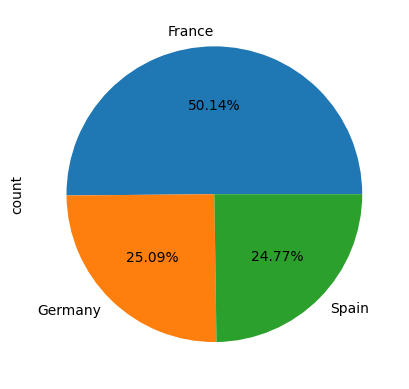

In [12]:
df['Geography'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

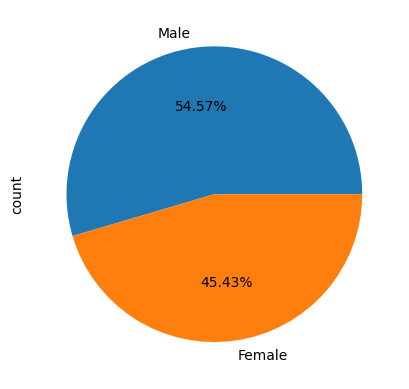

In [13]:
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

In [14]:
#Checking Null Values:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [15]:
# Checking Duplicates:
print(df.duplicated().sum())

0


In [16]:
#Label Encoding of objects:

#print all datatypes of objects
df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [17]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
for i in df.columns:
    if (df[i].dtype == 'object'):
        df[i]=label_encoding.fit_transform(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [19]:
x = df.drop(['Exited' , 'RowNumber' , 'Surname'], axis=1)

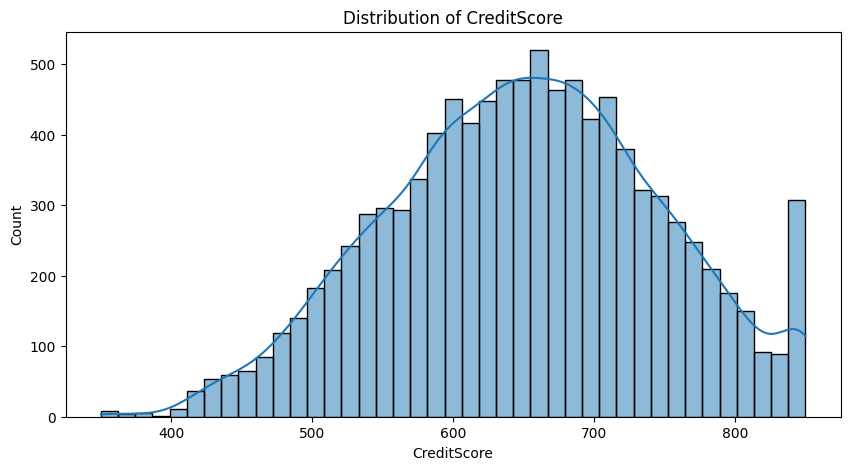

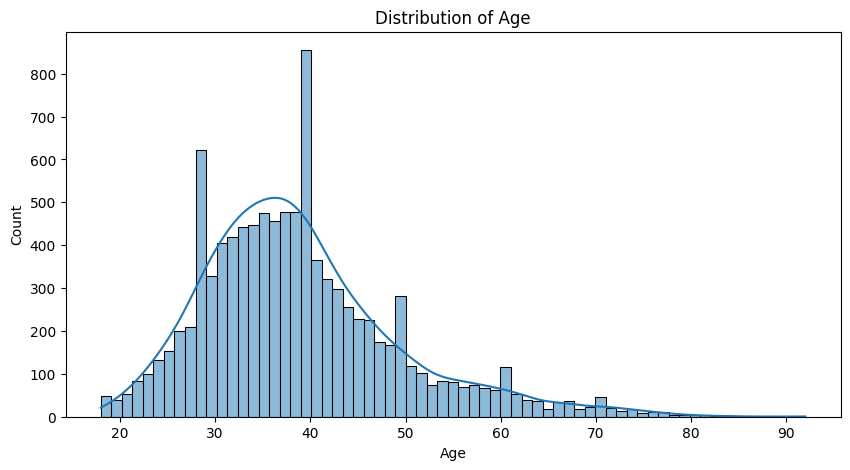

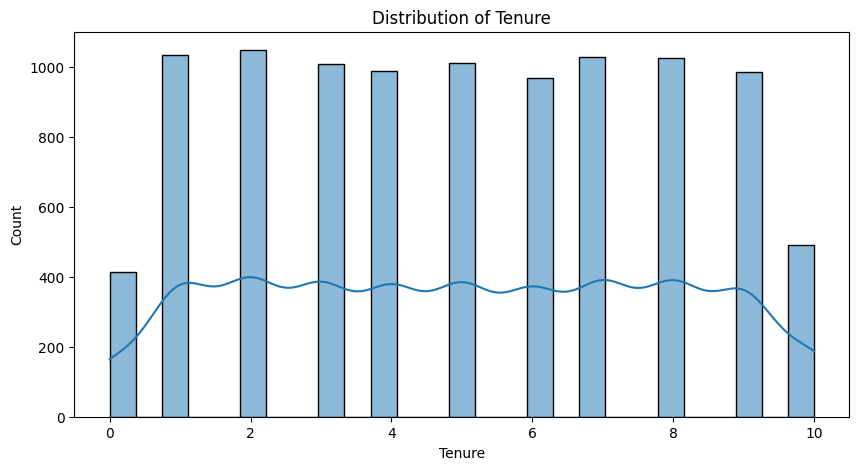

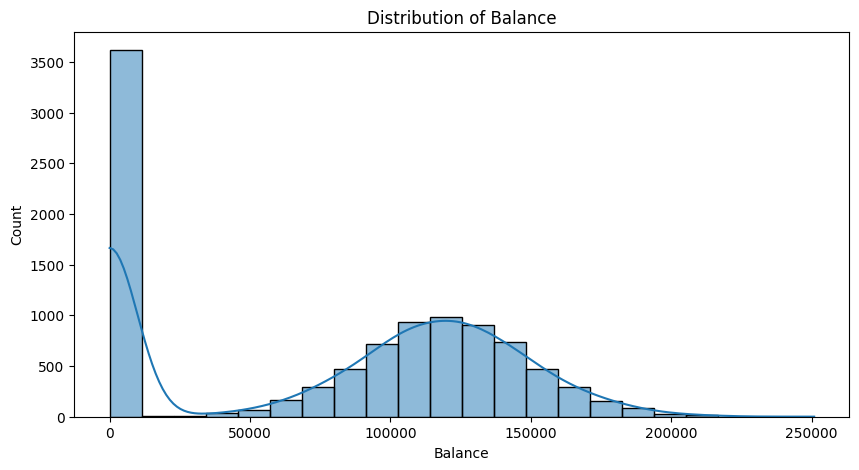

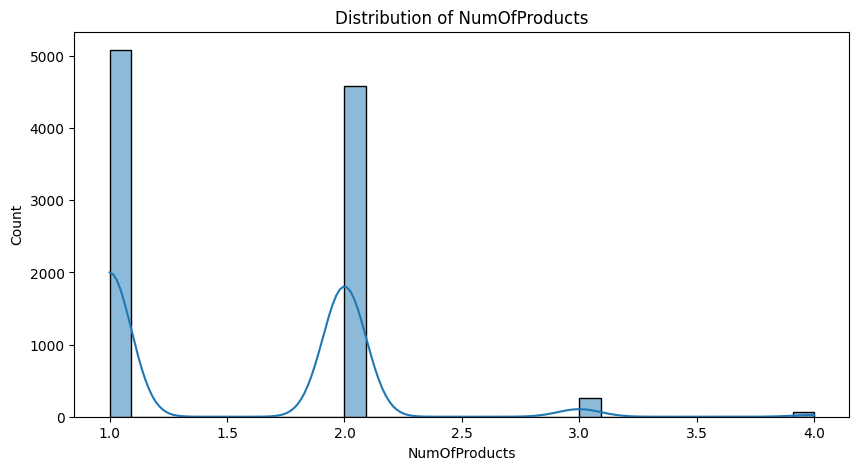

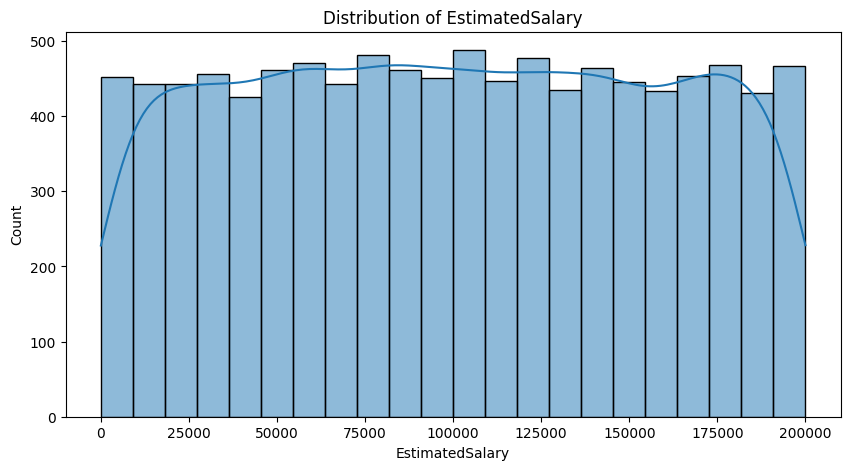

In [20]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

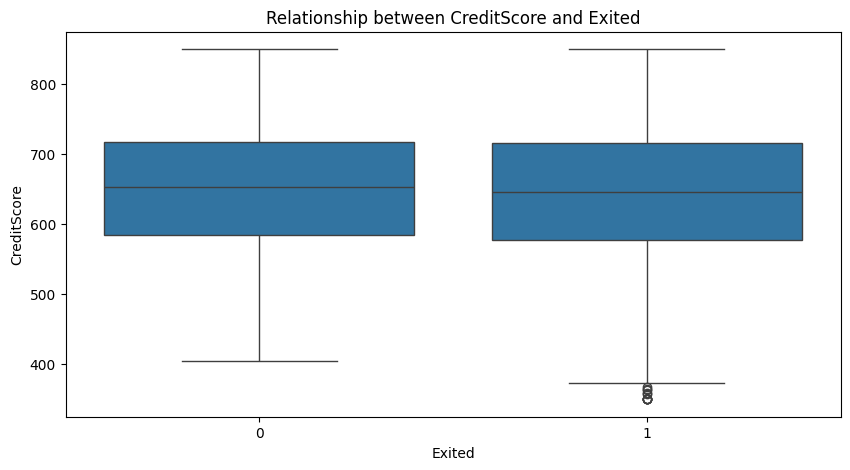

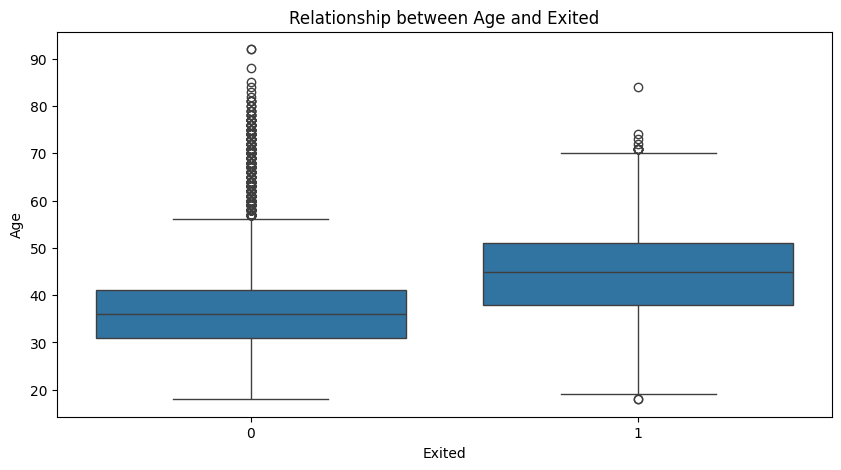

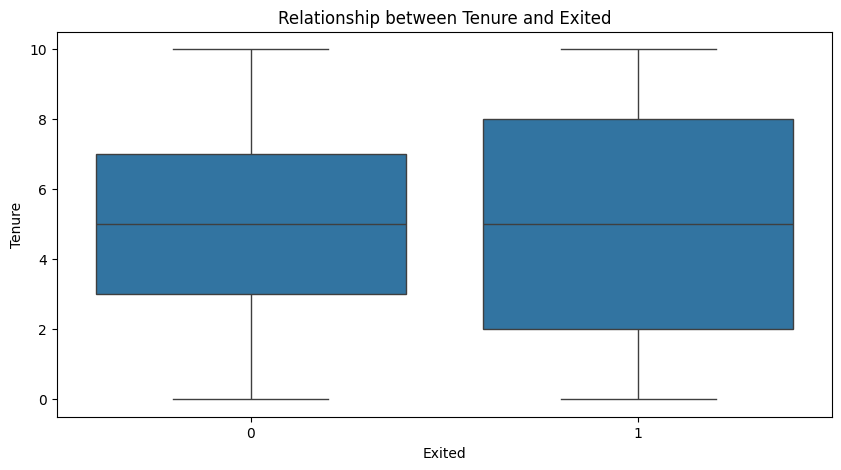

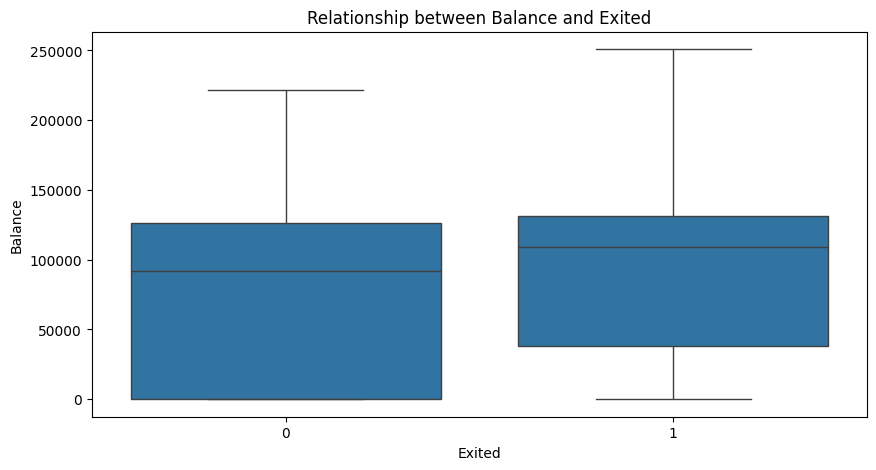

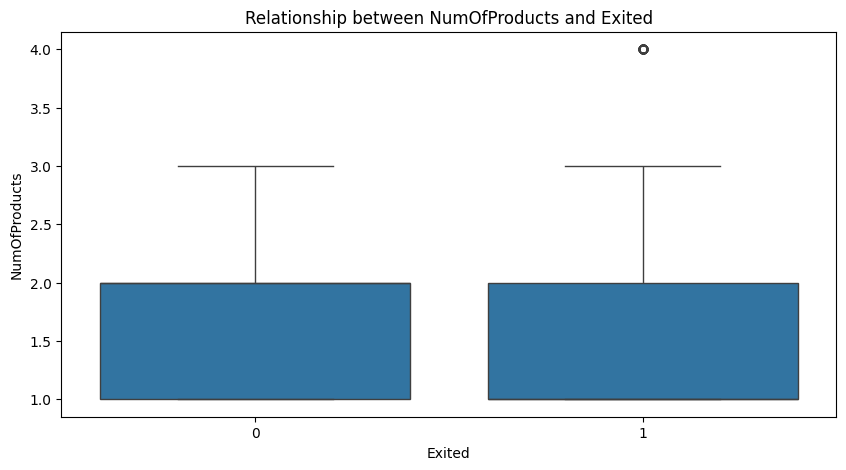

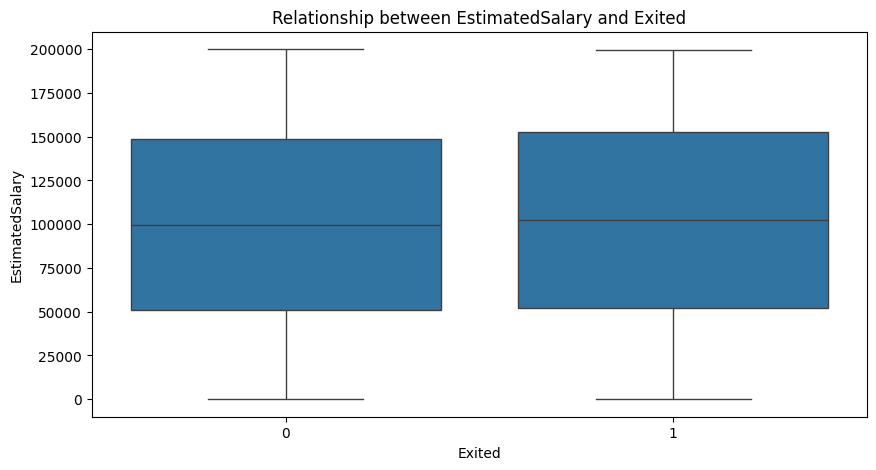

In [21]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Exited')
    plt.show()


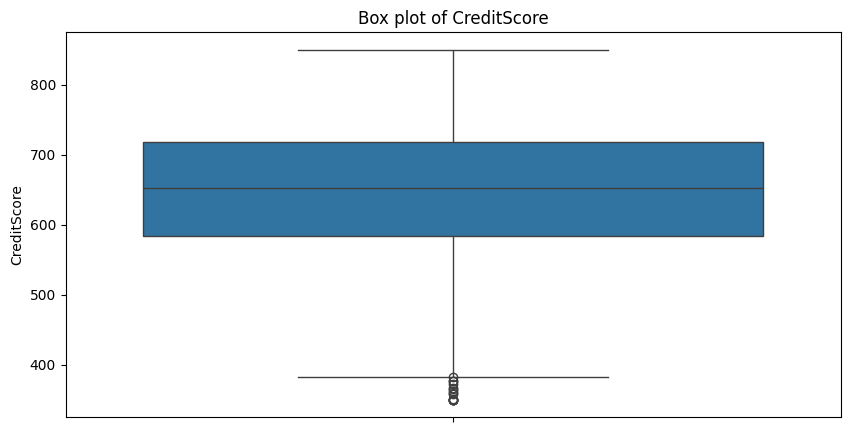

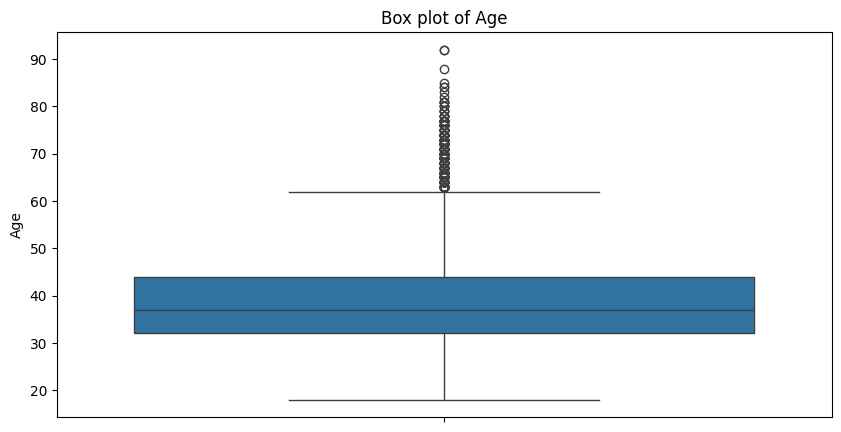

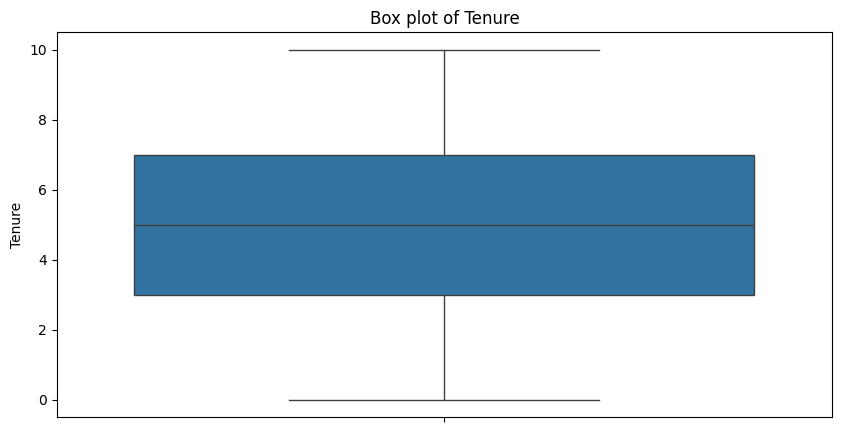

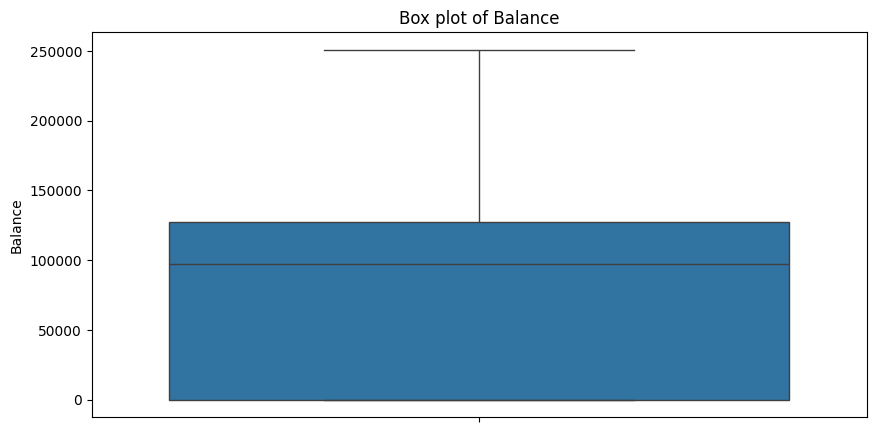

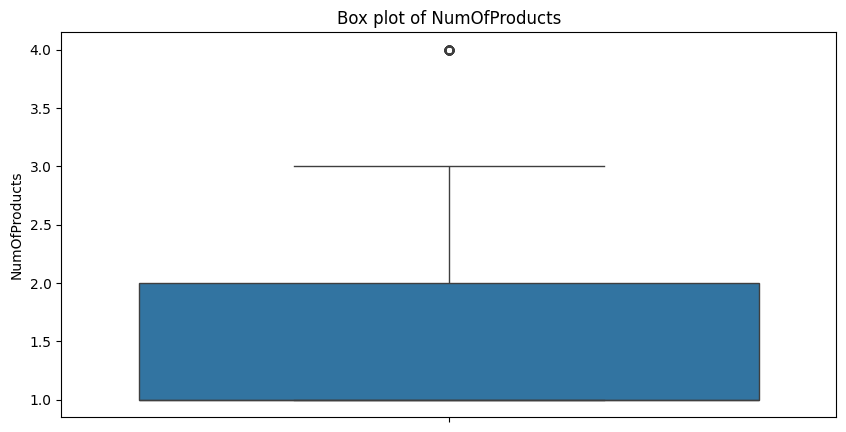

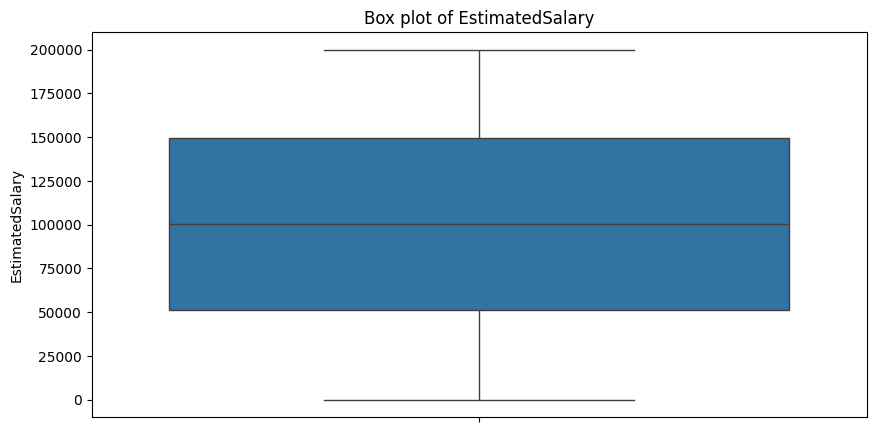

In [22]:
# Visualize the numerical features using box plots
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()


In [23]:

#check outlires
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = df[df[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = df[df[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

     # Replace outliers with adjusted values
    df[i] = np.where(df[i] < (q1 - norm_range), q1 - norm_range, df[i])
    df[i] = np.where(df[i] > (q3 + norm_range), q3 + norm_range, df[i])


The number of outliers in CreditScore: 15
The number of outliers in Age: 359
The number of outliers in Tenure: 0
The number of outliers in Balance: 0
The number of outliers in NumOfProducts: 60
The number of outliers in EstimatedSalary: 0


In [24]:
#check outlires
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = df[df[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = df[df[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in CreditScore: 0
The number of outliers in Age: 0
The number of outliers in Tenure: 0
The number of outliers in Balance: 0
The number of outliers in NumOfProducts: 0
The number of outliers in EstimatedSalary: 0


In [25]:
x = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (8000, 10)
x_test shape:  (2000, 10)
y_train shape:  (8000,)
y_test shape:  (2000,)


In [28]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686.0,0,1,32.0,6.0,0.00,2.0,1,1,179093.26
1561,632.0,1,1,42.0,4.0,119624.60,2.0,1,1,195978.86
1670,559.0,2,1,24.0,3.0,114739.92,1.0,1,0,85891.02
6087,561.0,0,0,27.0,9.0,135637.00,1.0,1,0,153080.40
6669,517.0,0,1,56.0,9.0,142147.32,1.0,0,0,39488.04


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

# NumPy allows for more efficient data storage and processing for mathematical calculations.
x_train = np.array(x_train)
x_test = np.array(x_test)

In [30]:

# Create Sequential Model
model = keras.models.Sequential()

# Adding our layers
from tensorflow.keras.layers import Dense , Flatten



model.add(Dense(10, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)



history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_split = 0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb]) #batch_size=32

Epoch 1/50
225/225 [==============================] - 4s 8ms/step - loss: 0.5102 - accuracy: 0.7976 - val_loss: 0.4546 - val_accuracy: 0.8125
Epoch 2/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.8026 - val_loss: 0.4358 - val_accuracy: 0.8150
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.8068 - val_loss: 0.4270 - val_accuracy: 0.8250
Epoch 4/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8082 - val_loss: 0.4219 - val_accuracy: 0.8350
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8092 - val_loss: 0.4190 - val_accuracy: 0.8350
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8099 - val_loss: 0.4169 - val_accuracy: 0.8325
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8104 - val_loss: 0.4155 - val_accuracy: 0.8313
Epoch 

In [31]:
#!pip install scikeras


In [32]:
'''
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the function to create the Keras model
def create_model(optimizer='adam'):
    model = keras.models.Sequential()
    model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Wrap the Keras model using the KerasClassifier
model = KerasClassifier(model=create_model, verbose=0, optimizer='adam', epochs=50)

# Define the parameter grid to search
param_grid = {
    'optimizer': ['SGD', 'adam'],
    'epochs': [50, 100]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)

# Fit the model
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Save the best model
best_model.model_.save("best_keras_model.h5")
'''

'\nimport numpy as np\nfrom tensorflow import keras\nfrom tensorflow.keras.layers import Dense\nfrom scikeras.wrappers import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\n\n# Define the function to create the Keras model\ndef create_model(optimizer=\'adam\'):\n    model = keras.models.Sequential()\n    model.add(Dense(10, input_dim=x_train.shape[1], activation=\'relu\'))\n    model.add(Dense(8, activation=\'relu\'))\n    model.add(Dense(1, activation=\'sigmoid\'))\n\n    model.compile(loss=\'binary_crossentropy\',\n                  optimizer=optimizer,\n                  metrics=[\'accuracy\'])\n    return model\n\n# Wrap the Keras model using the KerasClassifier\nmodel = KerasClassifier(model=create_model, verbose=0, optimizer=\'adam\', epochs=50)\n\n# Define the parameter grid to search\nparam_grid = {\n    \'optimizer\': [\'SGD\', \'adam\'],\n    \'epochs\': [50, 100]\n}\n\n# 

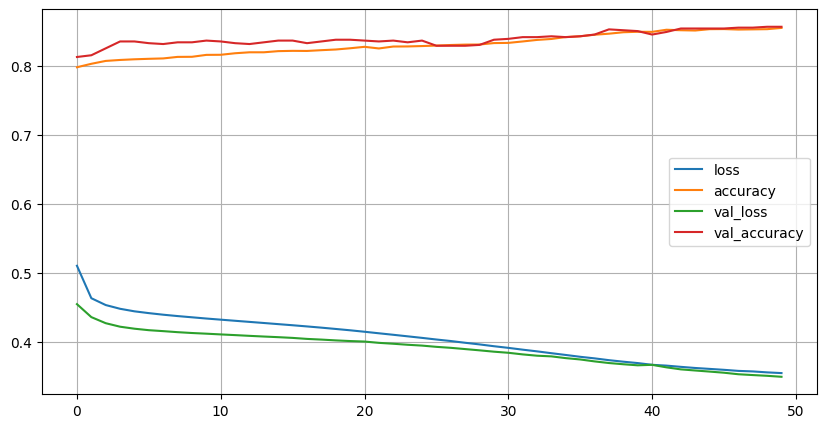

In [33]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [34]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8580


[0.3541039824485779, 0.8579999804496765]

In [35]:
y_pred = np.round(model.predict(x_test))

63/63 [==============================] - 0s 2ms/step


In [36]:
print(y_pred.shape)
print(y_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)



(2000, 1)
(2000,)
(2000, 1)


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)



array([[1553,   54],
       [ 230,  163]])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

